In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [40]:
data = pd.read_csv('train.csv')

In [41]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0] # label column is output
X_dev = data_dev[1:n] # pixel columns are inputs
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_, m_train = X_train.shape

In [43]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y) :
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha *dW1
    b1 = b1 - alpha *db1
    W2 = W2 - alpha *dW2
    b2 = b2 - alpha *db2
    return W1, b1, W2, b2

In [44]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [45]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[7 3 3 ... 0 7 0] [6 5 0 ... 3 1 7]
Accuracy:  0.05441463414634146
Iteration:  10
[6 3 3 ... 3 6 5] [6 5 0 ... 3 1 7]
Accuracy:  0.18295121951219512
Iteration:  20
[6 5 0 ... 3 6 5] [6 5 0 ... 3 1 7]
Accuracy:  0.2901463414634146
Iteration:  30
[6 5 0 ... 3 6 7] [6 5 0 ... 3 1 7]
Accuracy:  0.3675609756097561
Iteration:  40
[6 1 0 ... 5 6 7] [6 5 0 ... 3 1 7]
Accuracy:  0.42090243902439023
Iteration:  50
[6 1 0 ... 8 6 7] [6 5 0 ... 3 1 7]
Accuracy:  0.4703170731707317
Iteration:  60
[6 1 0 ... 5 6 7] [6 5 0 ... 3 1 7]
Accuracy:  0.5145365853658537
Iteration:  70
[6 5 0 ... 5 6 7] [6 5 0 ... 3 1 7]
Accuracy:  0.5520487804878049
Iteration:  80
[6 5 0 ... 5 6 7] [6 5 0 ... 3 1 7]
Accuracy:  0.5832439024390244
Iteration:  90
[6 5 0 ... 5 6 7] [6 5 0 ... 3 1 7]
Accuracy:  0.6104146341463415
Iteration:  100
[6 5 0 ... 5 6 7] [6 5 0 ... 3 1 7]
Accuracy:  0.6327560975609756
Iteration:  110
[6 5 0 ... 3 6 7] [6 5 0 ... 3 1 7]
Accuracy:  0.6518048780487805
Iteration:  120
[6 5 0 .

In [46]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


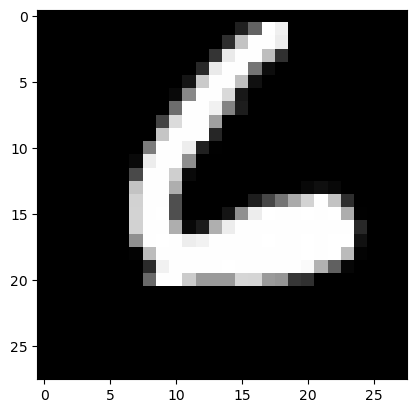

Prediction:  [5]
Label:  5


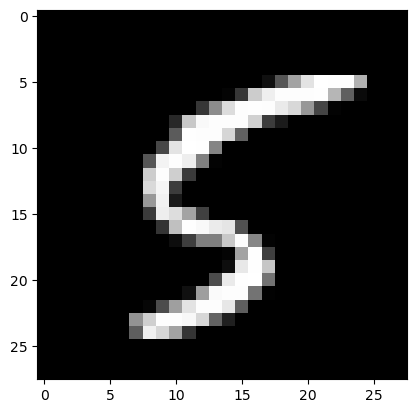

Prediction:  [0]
Label:  0


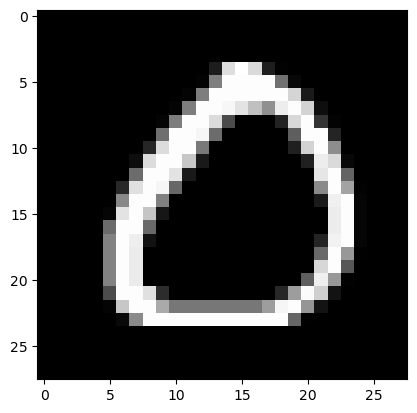

Prediction:  [4]
Label:  4


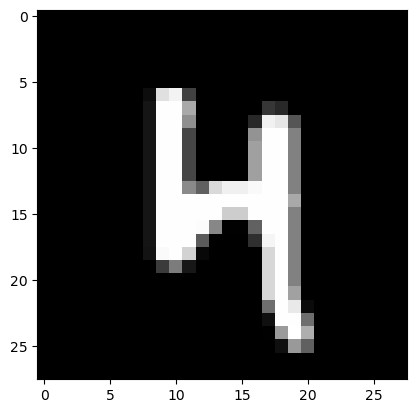

In [47]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)